In [ ]:
"""
Practice and explore networkx with topic_word

"""

In [1]:
import re, itertools
import networkx as nx

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
topic_df = pd.read_pickle('../dump/topic_df')
speech_df = pd.read_pickle('../dump/speech_clean_lemma')
topic_word = pd.read_pickle('../dump/to_nx_topic_words')

In [6]:
topic_word.head()

,Topic #01,Topic #02,Topic #03,Topic #04,advice,career,company,country,course,dream,...,place,president,question,sense,state,success,university,women,word,year
Topic #01,0,0,0,0,2,0,0,0,0,2,...,2,0,0,0,0,0,0,0,0,2
Topic #02,0,0,0,0,0,0,0,2,0,0,...,2,2,0,2,0,0,0,0,2,2
Topic #03,0,0,0,0,0,0,2,0,2,2,...,0,0,2,0,2,0,2,2,0,2
Topic #04,0,0,0,0,0,2,0,2,2,0,...,2,0,0,0,0,2,2,2,2,0
advice,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [159]:
# Create nodes

node_list = list(topic_word.columns)

In [160]:
# Create edge
topic_word_assoc = {}

relationships = itertools.combinations(node_list,2) 
for relationship in relationships:
    topic_word_assoc[relationship] = topic_word.loc[relationship[0],relationship[1]]

In [161]:
topic_word_assoc

{('Topic #01', 'Topic #02'): 0,
 ('Topic #01', 'Topic #03'): 0,
 ('Topic #01', 'Topic #04'): 0,
 ('Topic #01', 'advice'): 2,
 ('Topic #01', 'career'): 0,
 ('Topic #01', 'company'): 0,
 ('Topic #01', 'country'): 0,
 ('Topic #01', 'course'): 0,
 ('Topic #01', 'dream'): 2,
 ('Topic #01', 'education'): 0,
 ('Topic #01', 'family'): 2,
 ('Topic #01', 'friends'): 2,
 ('Topic #01', 'generation'): 0,
 ('Topic #01', 'home'): 2,
 ('Topic #01', 'idea'): 0,
 ('Topic #01', 'man'): 0,
 ('Topic #01', 'men'): 0,
 ('Topic #01', 'moment'): 2,
 ('Topic #01', 'nan'): 1,
 ('Topic #01', 'parent'): 2,
 ('Topic #01', 'person'): 2,
 ('Topic #01', 'place'): 2,
 ('Topic #01', 'president'): 0,
 ('Topic #01', 'question'): 0,
 ('Topic #01', 'sense'): 0,
 ('Topic #01', 'state'): 0,
 ('Topic #01', 'success'): 0,
 ('Topic #01', 'university'): 0,
 ('Topic #01', 'women'): 0,
 ('Topic #01', 'word'): 0,
 ('Topic #01', 'year'): 2,
 ('Topic #02', 'Topic #03'): 0,
 ('Topic #02', 'Topic #04'): 0,
 ('Topic #02', 'advice'): 0,
 

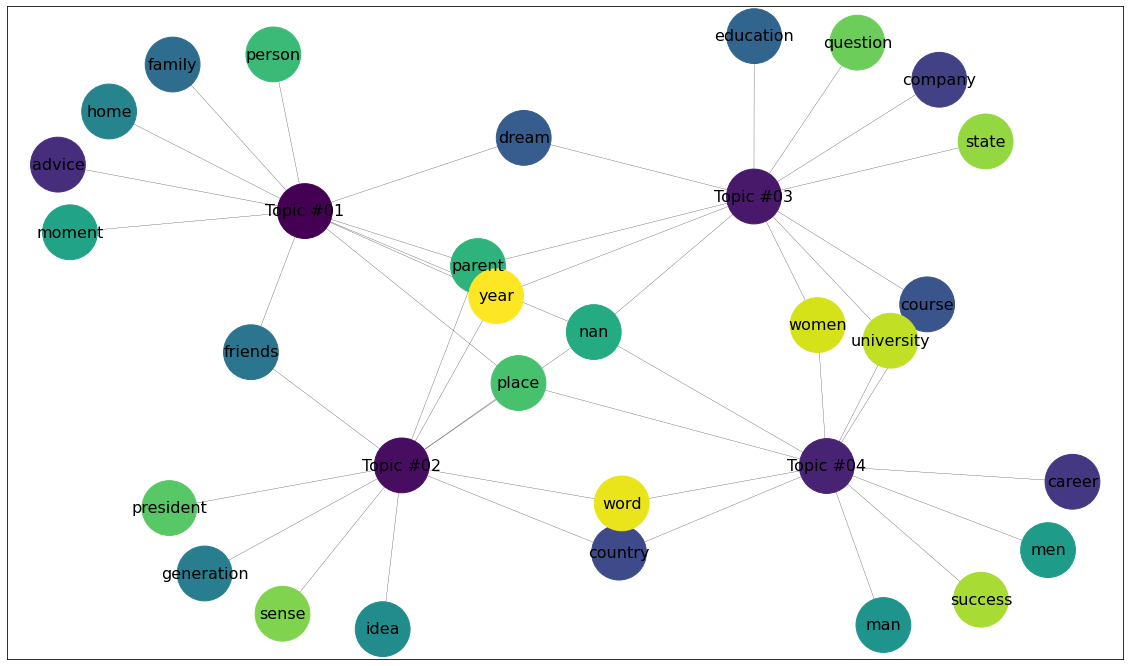

In [237]:
G = nx.Graph()

for node in node_list:
    G.add_node(node)

for edge, weight in topic_word_assoc.items():
    if weight != 0:
        G.add_edge(edge[0], edge[1], weight=weight)

# print(G.edges().data())

plt.rcParams['figure.figsize'] = [20, 12]
pos = nx.spring_layout(G, iterations=200) # Color by degrree
# nx.draw(G, pos, with_labels=True, node_size=5000, node_color=range(27), cmap=plt.cm.Blues)


# nodes
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color=range(32))

# edges
nx.draw_networkx_edges(G, pos, width=.3, alpha=0.8)

# labels
nx.draw_networkx_labels(G, pos, font_size=16)

plt.show()

In [238]:
# Add attribute ('type')

for n, d in list(G.nodes(data=True))[:4]:
    G.nodes[n]['type'] = 'topic'
for n, d in list(G.nodes(data=True))[4:]:
    G.nodes[n]['type'] = 'word'

In [239]:
from itertools import count    

types = ['topic','word']
mapping = {'topic':5, 'word':0.5}
nodes = G.nodes()
node_label = [mapping[G.nodes[n]['type']] for n in nodes]

In [240]:
# [v*5 for v in node_label]

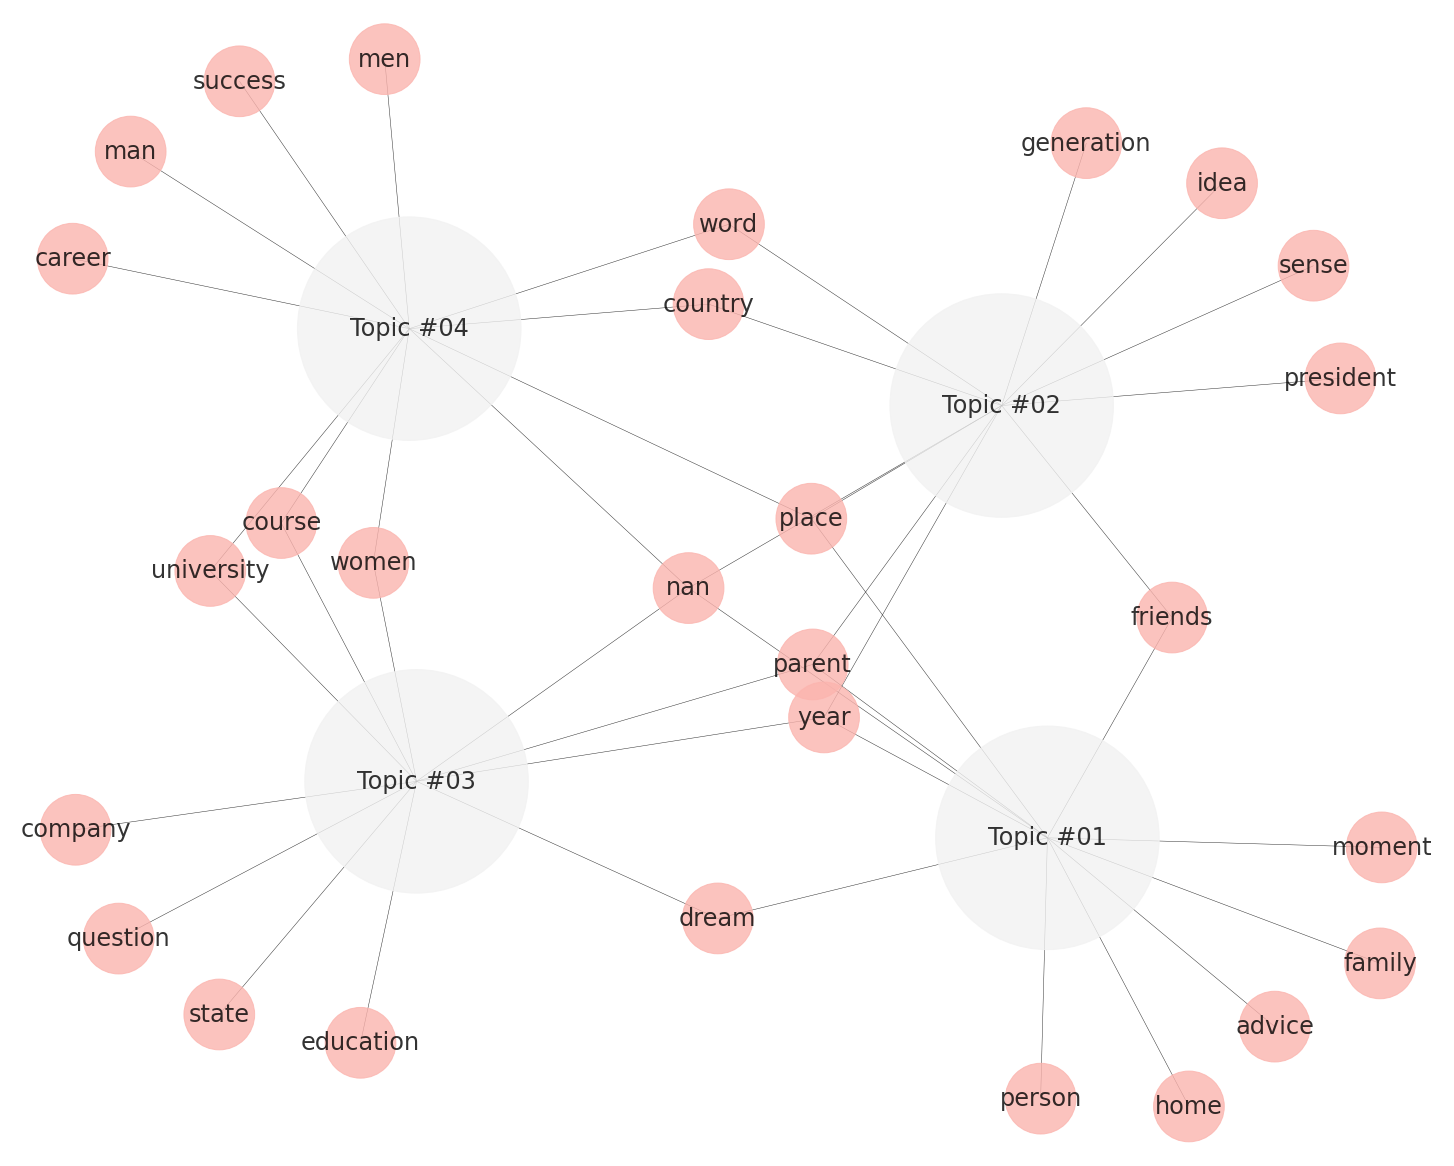

In [241]:
plt.rcParams['figure.figsize'] = [20, 16]

pos = nx.spring_layout(G, iterations=200, k=0.2, scale=0.5) # position of nodes

d = {'topic': 0, 'word': 1}
nx.draw(G, pos, node_color=node_label, cmap='Pastel1',
#         cmap=matplotlib.cm.get_cmap('Blues_r'),      #plt.cm.Blues
        nodelist = node_list, node_size=[v*10000 for v in node_label],
       width=.5, alpha=0.8,
       with_labels=True, font_size=24,)

In [242]:
pos_want = pos

In [105]:
plt.cm.Pastel1(X=0.5)

(0.996078431372549, 0.8509803921568627, 0.6509803921568628, 1.0)

In [56]:
import matplotlib
matplotlib.cm.get_cmap('Blues_r')

In [108]:
for edge in G.edges(data=True):
    nx.draw_networkx_edges(G, pos, edgelist=[(edge[0],edge[1])], connectionstyle=f'arc3, rad = {edge[2]["rad"]}')

KeyError: 'rad'

In [125]:
G.nodes()

NodeView(('Topic #01', 'Topic #02', 'Topic #03', 'Topic #04', 'advice', 'career', 'company', 'country', 'course', 'dream', 'education', 'family', 'friends', 'generation', 'home', 'idea', 'man', 'men', 'moment', 'nan', 'parent', 'person', 'place', 'president', 'question', 'sense', 'state', 'success', 'university', 'women', 'word', 'year'))

In [123]:
G.edges()

EdgeView([('Topic #01', 'advice'), ('Topic #01', 'dream'), ('Topic #01', 'family'), ('Topic #01', 'friends'), ('Topic #01', 'home'), ('Topic #01', 'moment'), ('Topic #01', 'nan'), ('Topic #01', 'parent'), ('Topic #01', 'person'), ('Topic #01', 'place'), ('Topic #01', 'year'), ('Topic #02', 'country'), ('Topic #02', 'friends'), ('Topic #02', 'generation'), ('Topic #02', 'idea'), ('Topic #02', 'nan'), ('Topic #02', 'parent'), ('Topic #02', 'place'), ('Topic #02', 'president'), ('Topic #02', 'sense'), ('Topic #02', 'word'), ('Topic #02', 'year'), ('Topic #03', 'company'), ('Topic #03', 'course'), ('Topic #03', 'dream'), ('Topic #03', 'education'), ('Topic #03', 'nan'), ('Topic #03', 'parent'), ('Topic #03', 'question'), ('Topic #03', 'state'), ('Topic #03', 'university'), ('Topic #03', 'women'), ('Topic #03', 'year'), ('Topic #04', 'career'), ('Topic #04', 'country'), ('Topic #04', 'course'), ('Topic #04', 'man'), ('Topic #04', 'men'), ('Topic #04', 'nan'), ('Topic #04', 'place'), ('Topic

In [120]:
for n in G.edges():
    print(n)

('Topic #01', 'advice')
('Topic #01', 'dream')
('Topic #01', 'family')
('Topic #01', 'friends')
('Topic #01', 'home')
('Topic #01', 'moment')
('Topic #01', 'nan')
('Topic #01', 'parent')
('Topic #01', 'person')
('Topic #01', 'place')
('Topic #01', 'year')
('Topic #02', 'country')
('Topic #02', 'friends')
('Topic #02', 'generation')
('Topic #02', 'idea')
('Topic #02', 'nan')
('Topic #02', 'parent')
('Topic #02', 'place')
('Topic #02', 'president')
('Topic #02', 'sense')
('Topic #02', 'word')
('Topic #02', 'year')
('Topic #03', 'company')
('Topic #03', 'course')
('Topic #03', 'dream')
('Topic #03', 'education')
('Topic #03', 'nan')
('Topic #03', 'parent')
('Topic #03', 'question')
('Topic #03', 'state')
('Topic #03', 'university')
('Topic #03', 'women')
('Topic #03', 'year')
('Topic #04', 'career')
('Topic #04', 'country')
('Topic #04', 'course')
('Topic #04', 'man')
('Topic #04', 'men')
('Topic #04', 'nan')
('Topic #04', 'place')
('Topic #04', 'success')
('Topic #04', 'university')
('To

In [268]:
def new_add_edge(G, a, b):
    if (a, b) in G.edges:
        max_rad = max(x[2]['rad'] for x in G.edges(data=True) if sorted(x[:2]) == sorted([a,b]))
    else:
        max_rad = 0
    G.add_edge(a, b, rad=max_rad+0.5)

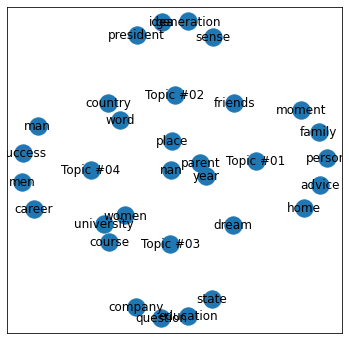

In [269]:
G = nx.MultiDiGraph()
# G = nx.Graph()

for node in node_list:
    G.add_node(node)
    


# for i in range(5):
#     new_add_edge(G, 'n2', 'n1')

plt.figure(figsize=(6,6))

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos=pos_want)
nx.draw_networkx_labels(G, pos=pos_want)

for edge in G.edges(data=True):
    nx.draw_networkx_edges(G, pos, edgelist=[(edge[0],edge[1])], connectionstyle=f'arc3, rad = {edge[2]["rad"]}')

plt.show()

In [270]:
for edge, weight in topic_word_assoc.items():
    if weight != 0:
#         G.add_edge(edge[0], edge[1], weight=weight)
        new_add_edge(G,edge[0],edge[1])

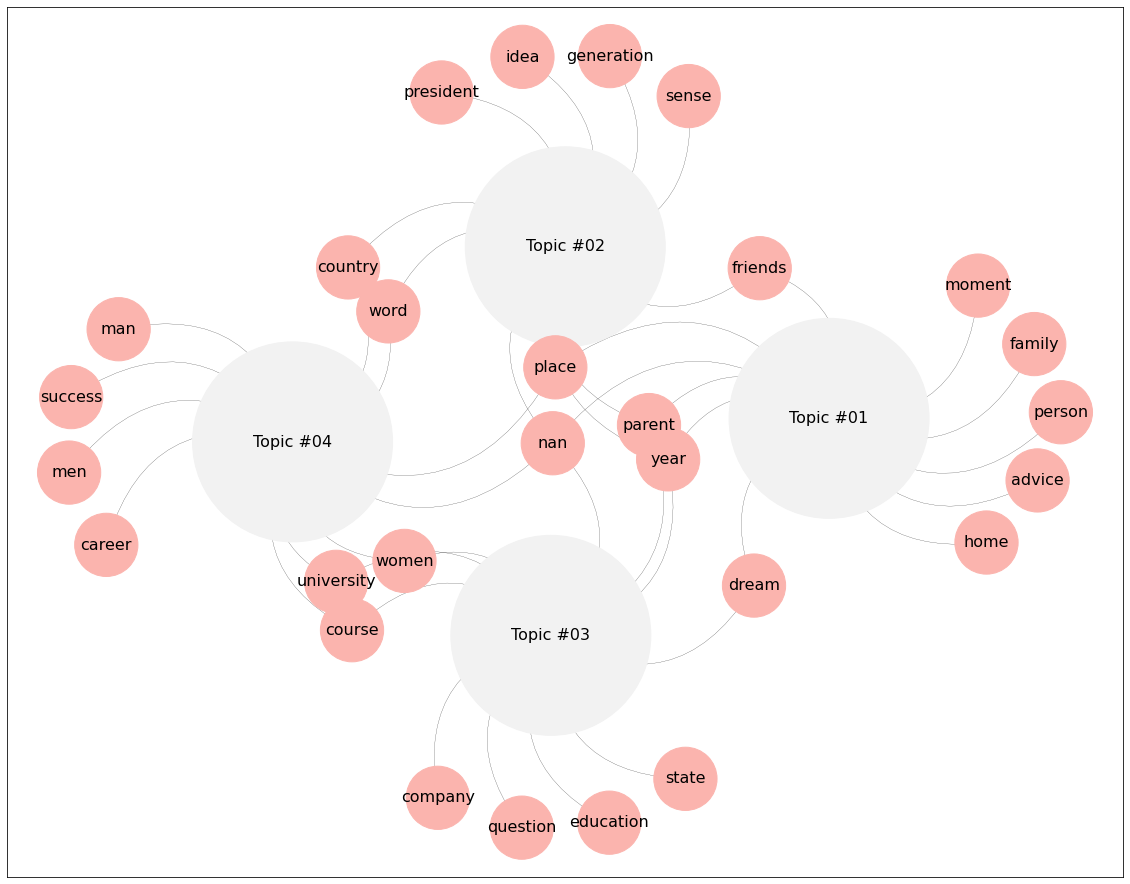

In [274]:
plt.figure(figsize=(20,16))

# # pos = nx.spring_layout(G)
# nx.draw_networkx_nodes(G, pos=pos_want)
# nx.draw_networkx_labels(G, pos=pos_want)

# nodes
nx.draw_networkx_nodes(G, pos=pos_want, node_color=node_label, cmap='Pastel1', # post_want was saved from default plot
        nodelist = node_list, node_size=[v*8000 for v in node_label],)
# labels
nx.draw_networkx_labels(G, pos=pos_want, font_size=16)



for edge in G.edges(data=True):
    nx.draw_networkx_edges(G, pos=pos_want,
                           edgelist=[(edge[0],edge[1])], connectionstyle=f'arc3, rad = {edge[2]["rad"]}',
                           width=.2,arrowsize=1)

plt.show()

In [386]:
# Create graph
G = nx.MultiDiGraph()

# Add nodes
for node in node_list:
    G.add_node(node)
    
# Add edges
for edge, weight in topic_word_assoc.items():
    if weight != 0:
        new_add_edge(G,edge[0],edge[1])

In [387]:
# Add attribute ('type')

for n, d in list(G.nodes(data=True))[:4]:
    G.nodes[n]['type'] = 'topic'
for n, d in list(G.nodes(data=True))[4:]:
    G.nodes[n]['type'] = 'word'
    
# Quantify node label for size and color
from itertools import count
types = ['topic','word']
mapping = {'topic':3, 'word':0.5}
nodes = G.nodes()
node_label = [mapping[G.nodes[n]['type']] for n in nodes]

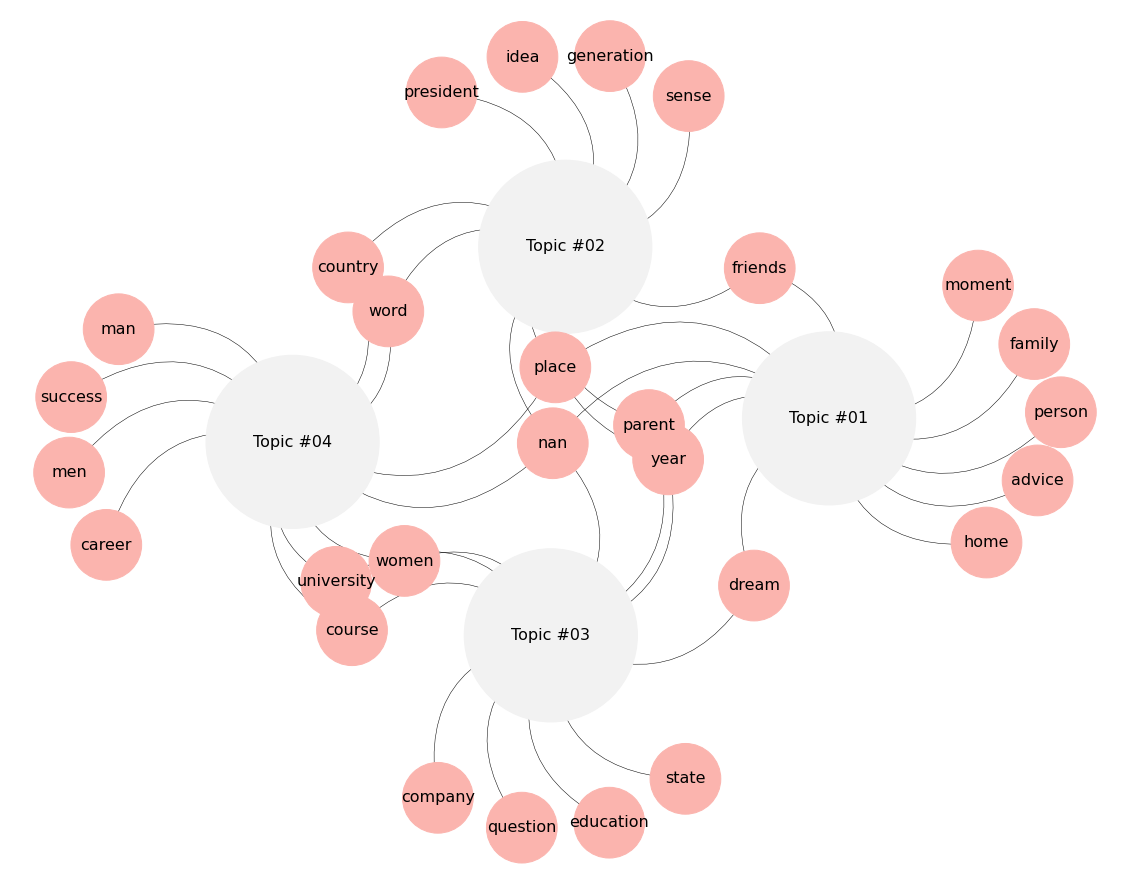

In [388]:
plt.rcParams['figure.figsize'] = [20, 16]

fig, ax = plt.subplots()
# nodes
nx.draw_networkx_nodes(G, pos=pos_want, node_color=node_label, cmap='Pastel1', # post_want was saved from default plot
        nodelist = node_list, node_size=[v*10000 for v in node_label],)
# labels
nx.draw_networkx_labels(G, pos=pos_want, font_size=16)


# edges
for edge in G.edges(data=True):
    
    nx.draw_networkx_edges(G, pos=pos_want,
                           edgelist=[(edge[0],edge[1])], connectionstyle=f'arc3, rad = {edge[2]["rad"]}',
                           width=.5,edge_color='k',arrowsize=1)

ax.axis('off');

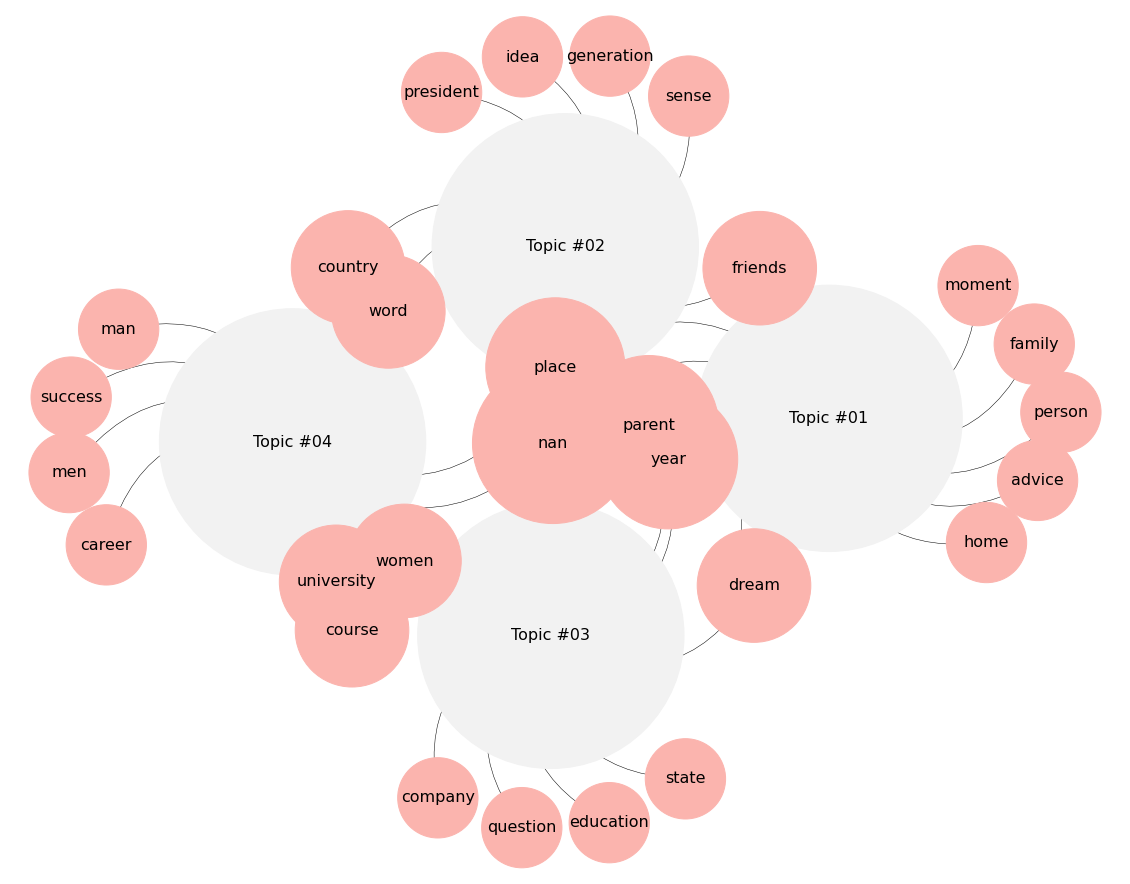

In [349]:
plt.rcParams['figure.figsize'] = [20, 16]

fig, ax = plt.subplots()

# nodes
degree = list(nx.degree_centrality(G).values())
nx.draw_networkx_nodes(G, pos=pos_want, node_color=node_label, cmap='Pastel1', # post_want was saved from default plot
        nodelist = node_list, node_size=[v*200000 for v in degree],)
# labels
nx.draw_networkx_labels(G, pos=pos_want, font_size=16)



# edges
for edge in G.edges(data=True):    
    nx.draw_networkx_edges(G, pos=pos_want,
                           edgelist=[(edge[0],edge[1])], connectionstyle=f'arc3, rad = {edge[2]["rad"]}',
                           width=.5,edge_color='k',arrowsize=1)

ax.axis('off');

## Try out Plotly

In [350]:
import plotly.graph_objects as go

In [357]:
# Example from tutorial
G = nx.random_geometric_graph(200, 0.125)
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))


# Color node points by number of connection
# Or: size points by number of connections (node_trace.marker.size = node_adjacencies)
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
# node_trace.marker.size = node_adjacencies
node_trace.text = node_text

In [358]:
# Create network graph
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[
                    dict(
                    text="Made by Katie",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 )
                    ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

In [385]:
# Topic words

# Create networkx graph

G = nx.Graph()
pos = nx.spring_layout(G, iterations=200)

# Create nodes and edges
for node in node_list:
    G.add_node(node)
for edge, weight in topic_word_assoc.items():
    if weight != 0:
        G.add_edge(edge[0], edge[1], weight=weight)
        
# Add attribute ('type') for node color
for n, d in list(G.nodes(data=True))[:4]:
    G.nodes[n]['type'] = 'topic'
for n, d in list(G.nodes(data=True))[4:]:
    G.nodes[n]['type'] = 'word'
    
# Assign values to 'type' (if want to use 'type' as node size partition)
types = ['topic','word']
mapping = {'topic':5, 'word':0.5}
nodes = G.nodes()
node_label = [mapping[G.nodes[n]['type']] for n in nodes]


# Draw
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))


# Color node points by number of connection
# Or: size points by number of connections (node_trace.marker.size = node_adjacencies)
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
# node_trace.marker.size = node_adjacencies
node_trace.text = node_text

KeyError: 'pos'

In [361]:
G = nx.random_geometric_graph(200, 0.125)


In [366]:
pos

{}

In [369]:
G = nx.Graph()
pos = nx.spring_layout(G, iterations=200)

# Create nodes and edges
for node in node_list:
    G.add_node(node)
for edge, weight in topic_word_assoc.items():
    if weight != 0:
        G.add_edge(edge[0], edge[1], weight=weight)
        
# Add attribute ('type') for node color
for n, d in list(G.nodes(data=True))[:4]:
    G.nodes[n]['type'] = 'topic'
for n, d in list(G.nodes(data=True))[4:]:
    G.nodes[n]['type'] = 'word'
    
# Assign values to 'type' (if want to use 'type' as node size partition)
types = ['topic','word']
mapping = {'topic':5, 'word':0.5}
nodes = G.nodes()
node_label = [mapping[G.nodes[n]['type']] for n in nodes]



pos=nx.fruchterman_reingold_layout(G)

In [371]:
N = len(node_list)
N

32

In [375]:
pos

{'Topic #01': array([0.53232182, 0.24632333]),
 'Topic #02': array([ 0.245824 , -0.4106572]),
 'Topic #03': array([-0.27287801,  0.43198255]),
 'Topic #04': array([-0.52044819, -0.28962754]),
 'advice': array([1.        , 0.28955086]),
 'career': array([-0.961167  , -0.45606864]),
 'company': array([-0.19848189,  0.87395914]),
 'country': array([-0.16649466, -0.45095011]),
 'course': array([-0.57613052,  0.07886172]),
 'dream': array([0.16966067, 0.51515604]),
 'education': array([-0.39019198,  0.89056778]),
 'family': array([0.95669851, 0.10773702]),
 'friends': array([ 0.5727497 , -0.15112399]),
 'generation': array([ 0.55359371, -0.76247646]),
 'home': array([0.83487779, 0.59070488]),
 'idea': array([ 0.20667202, -0.86210905]),
 'man': array([-0.68505835, -0.70789947]),
 'men': array([-0.97692576, -0.2610144 ]),
 'moment': array([0.6611561 , 0.65723406]),
 'nan': array([-0.0456466 ,  0.01214299]),
 'parent': array([0.13414155, 0.09325397]),
 'person': array([0.94685547, 0.45680051])

In [382]:
import plotly.graph_objects as go

Xv=[pos[k][0] for k in node_list]
Yv=[pos[k][1] for k in node_list]
Xed=[]
Yed=[]
for edge in list(G.edges()):
    Xed+=[pos[edge[0]][0],pos[edge[1]][0], None]
    Yed+=[pos[edge[0]][1],pos[edge[1]][1], None]

trace3=go.Scatter(x=Xed,
               y=Yed,
               mode='lines',
               line=dict(color='rgb(210,210,210)', width=1),
               hoverinfo='none'
               )
trace4=go.Scatter(x=Xv,
               y=Yv,
               mode='markers',
               name='net',
               marker=dict(symbol='circle-dot',
                             size=5,
                             color='#6959CD',
                             line=dict(color='rgb(50,50,50)', width=0.5)
                             ),
#                text=labels,
#                hoverinfo='text'
               )

annot="This networkx.Graph has the Fruchterman-Reingold layout<br>Code:"+\
"<a href='http://nbviewer.ipython.org/gist/empet/07ea33b2e4e0b84193bd'> [2]</a>"

data1=[trace3, trace4]
fig1=go.Figure(data=data1, layout=layout)
fig1['layout']['annotations'][0]['text']=annot
py.iplot(fig1, filename='Coautorship-network-nx')

NameError: name 'layout' is not defined

100%|██████████| 2000/2000 [00:04<00:00, 450.28it/s]


BarnesHut Approximation  took  1.69  seconds
Repulsion forces  took  1.98  seconds
Gravitational forces  took  0.05  seconds
Attraction forces  took  0.21  seconds
AdjustSpeedAndApplyForces step  took  0.24  seconds


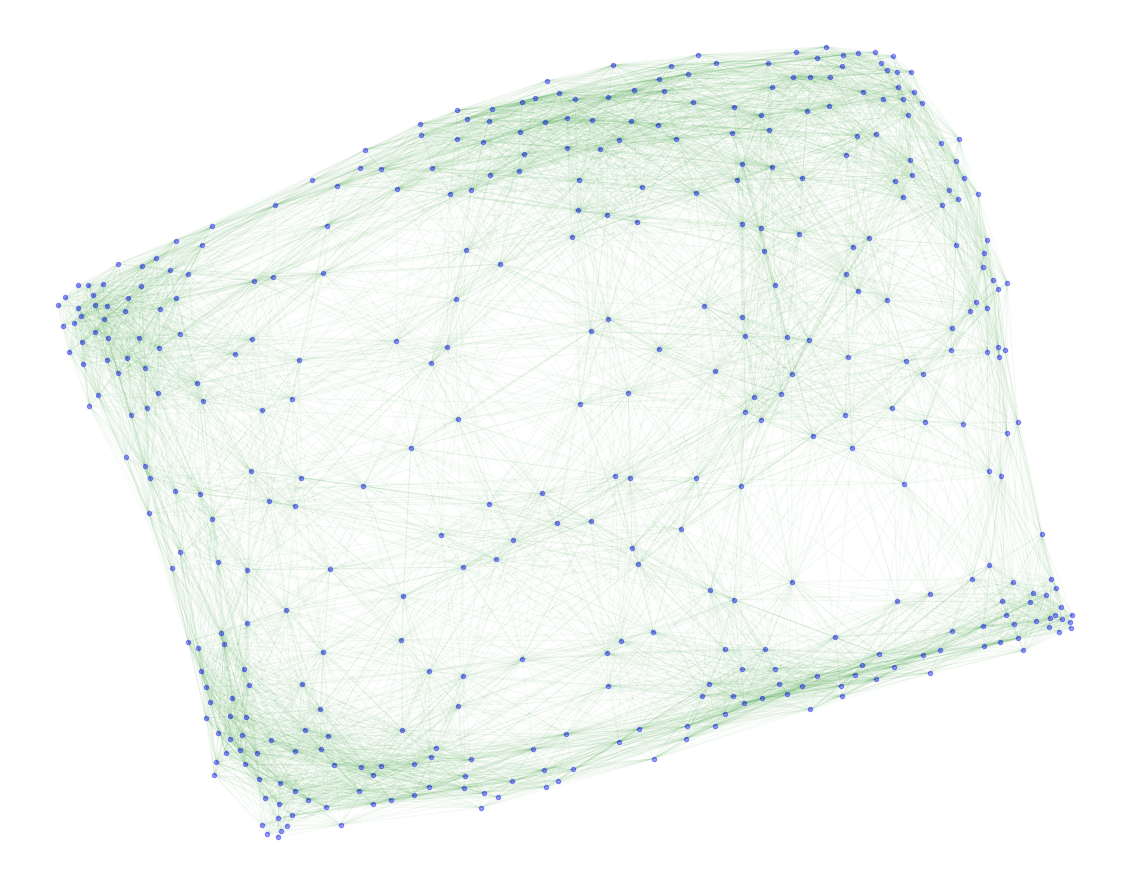

ModuleNotFoundError: No module named 'igraph'

In [384]:
import networkx as nx
from fa2 import ForceAtlas2
import matplotlib.pyplot as plt

G = nx.random_geometric_graph(400, 0.2)

forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=2.0,
                        strongGravityMode=False,
                        gravity=1.0,

                        # Log
                        verbose=True)

positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=2000)
nx.draw_networkx_nodes(G, positions, node_size=20, node_color="blue", alpha=0.4)
nx.draw_networkx_edges(G, positions, edge_color="green", alpha=0.05)
plt.axis('off')
plt.show()

# equivalently
import igraph
G = igraph.Graph.TupleList(G.edges(), directed=False)
layout = forceatlas2.forceatlas2_igraph_layout(G, pos=None, iterations=2000)
igraph.plot(G, layout).show()

100%|██████████| 2000/2000 [00:00<00:00, 10360.87it/s]


BarnesHut Approximation  took  0.06  seconds
Repulsion forces  took  0.07  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.03  seconds


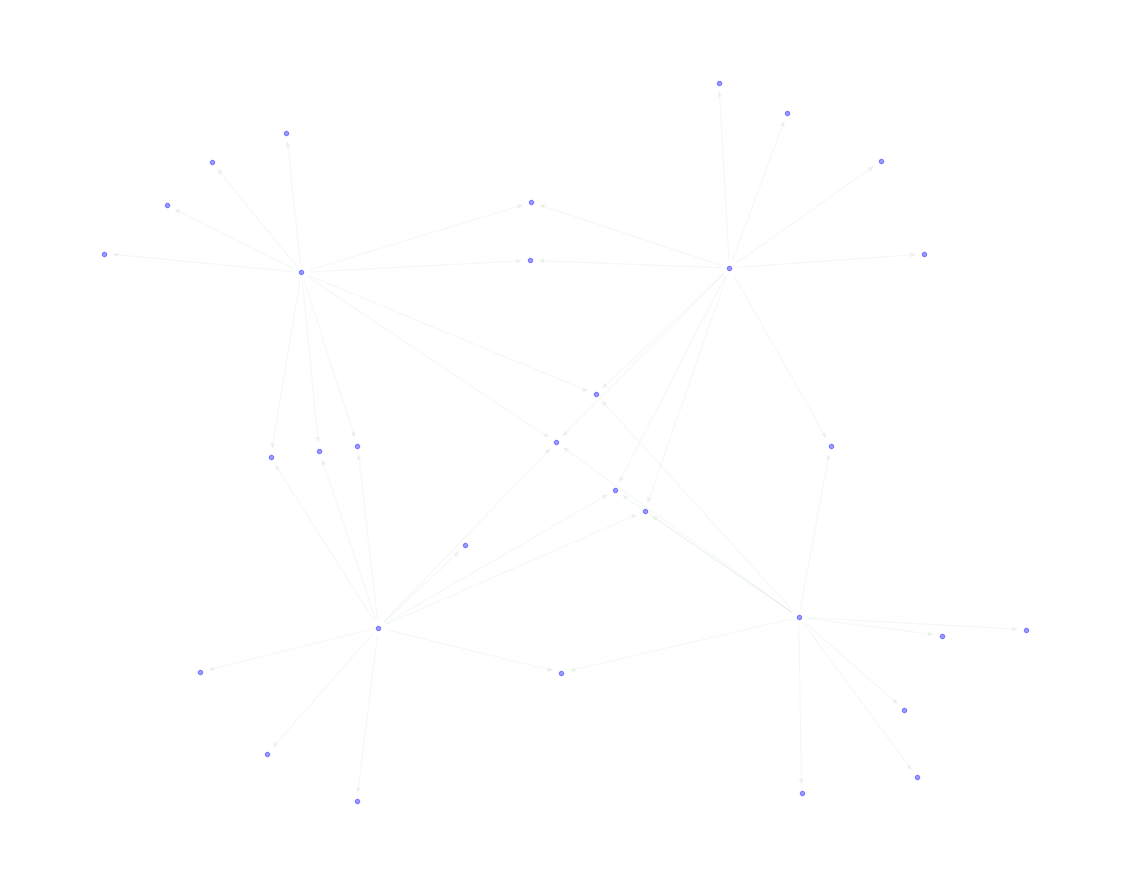

In [389]:
# G = nx.random_geometric_graph(400, 0.2)

forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=2.0,
                        strongGravityMode=False,
                        gravity=1.0,

                        # Log
                        verbose=True)

positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=2000)
nx.draw_networkx_nodes(G, positions, node_size=20, node_color="blue", alpha=0.4)
nx.draw_networkx_edges(G, positions, edge_color="green", alpha=0.05)
plt.axis('off')
plt.show()
